# Bond Biography: The Currency Sixes

## Overview
The Currency Sixes bonds were instrumental in financing the construction of the Transcontinental Railroads in the United States. These bonds played a crucial role in the economic development of the country during the 19th century.

## Features of the Bond
- **Issue Date:** The Currency Sixes were issued between 1862 and 1869.
- **Coupon Rate:** These bonds had a coupon rate of 6%, paid semi-annually.
- **Maturity Date:** The bonds had varied maturity dates, typically ranging from 10 to 30 years.
- **Principal Value:** The bonds were typically issued with a principal value of $1,000.
- **Call Features:** The bonds were callable after 10 years.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Load bond price data
prices_file_path = 'data/Macaulay_table2_railroad_bond_prices.xlsx'
bond_prices = pd.read_excel(prices_file_path)

# Preprocess bond price data
bond_prices = bond_prices.drop(0)
bond_prices['Unnamed: 0'].fillna(method='ffill', inplace=True)
bond_prices.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
bond_prices['No.'] = bond_prices['No.'].str.replace('Febuary', 'February')
bond_prices['Date'] = pd.to_datetime(bond_prices['Year'].astype(str) + ' ' + bond_prices['No.'], errors='coerce')

price_columns = [col for col in bond_prices.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]
bond_prices[price_columns] = bond_prices[price_columns].apply(pd.to_numeric, errors='coerce')

# Load bond yield data
yields_file_path = 'data/Macaulay_table3_railroad_bond_yields.xlsx'
bond_yields = pd.read_excel(yields_file_path)

# Preprocess bond yield data
bond_yields = bond_yields.drop(0)
bond_yields['Unnamed: 0'].fillna(method='ffill', inplace=True)
bond_yields.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
bond_yields['No.'] = bond_yields['No.'].str.replace('Febuary', 'February')
bond_yields['Date'] = pd.to_datetime(bond_yields['Year'].astype(str) + ' ' + bond_yields['No.'], errors='coerce')

yield_columns = [col for col in bond_yields.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]
bond_yields[yield_columns] = bond_yields[yield_columns].apply(pd.to_numeric, errors='coerce')

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_20298/1615701716.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bond_prices['Unnamed: 0'].fillna(method='ffill', inplace=True)
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_20298/1615701716.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bond_prices['Date'] = pd.to_datetime(bond_prices['Year'].astype(str) + ' ' + bond_prices['No.'], errors='coerce')
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  fo

## Purpose of Issuance
The primary purpose of issuing the Currency Sixes was to fund the construction of the Transcontinental Railroads, which were essential for connecting the eastern and western United States. This infrastructure project facilitated trade, travel, and economic expansion across the country.

## Amount Authorized and Sold
Congress authorized a substantial amount of these bonds, with approximately $64 million in bonds being sold to finance the railroads. The total amount sold varied over the years, reflecting the ongoing funding needs of the railroad construction.

## Original Sale Price and Secondary Market Price History
The bonds were originally sold at par value, $1,000. The price trends of the Currency Sixes bonds show significant fluctuations over time, influenced by various factors including economic conditions, investor confidence, and the progress of the railroad projects. Prices in the secondary market varied, sometimes trading at a premium or discount to par value, depending on market conditions.

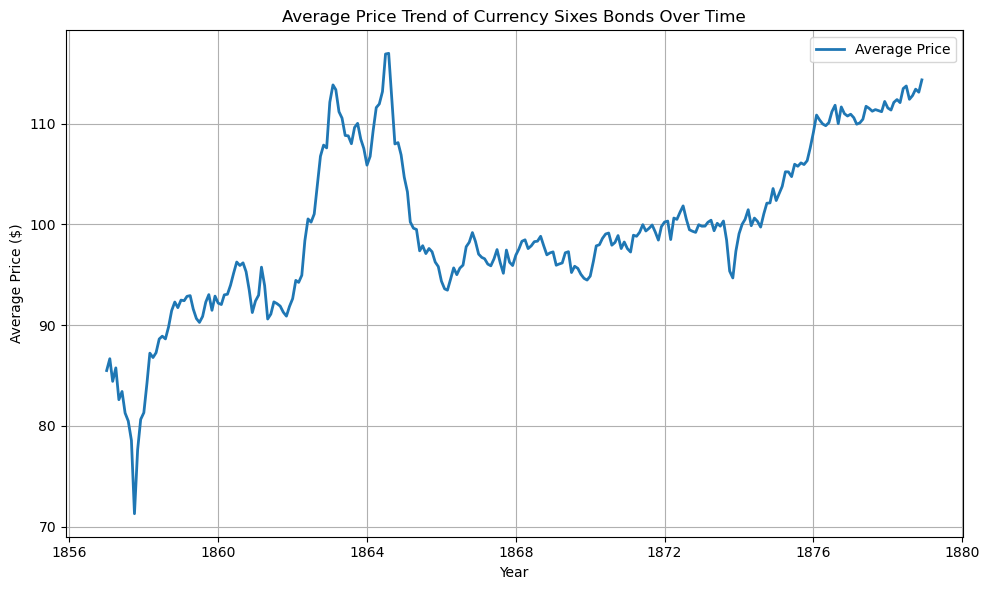

In [19]:
def plot_average_price():
    avg_price = bond_prices[price_columns].mean(axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(bond_prices['Date'], avg_price, label='Average Price', linewidth=2)
    plt.title('Average Price Trend of Currency Sixes Bonds Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Price ($)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_average_price()

## Redemption
The Currency Sixes were eventually redeemed by the U.S. government, typically at par value. The redemption of these bonds was a significant financial event, marking the completion of the funding for the Transcontinental Railroads.

## Investors
The Currency Sixes were purchased by a variety of investors, including financial institutions, private investors, and foreign investors. The bonds were attractive due to their government backing and the crucial role of the railroads in economic expansion.
Original Large Private Investors: Dr. Thomas C. Durant - Already associated with the construction of Mississippi Railroad. Sought to increase his own venture capital. Promoted shares and sold 2,177 by December 29, 1963, Mark Hopkins, James Bailey, Charles Crocker, and Leland Stanford (Original Central Pacific Investors).

## Yield Trends
The yield trends of the Currency Sixes bonds reflect the return on investment for bondholders. These trends were influenced by various factors, including economic conditions, investor sentiment, and the progress of the railroad projects.

/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_20298/2190100410.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  avg_yield = avg_yield.fillna(method='ffill')


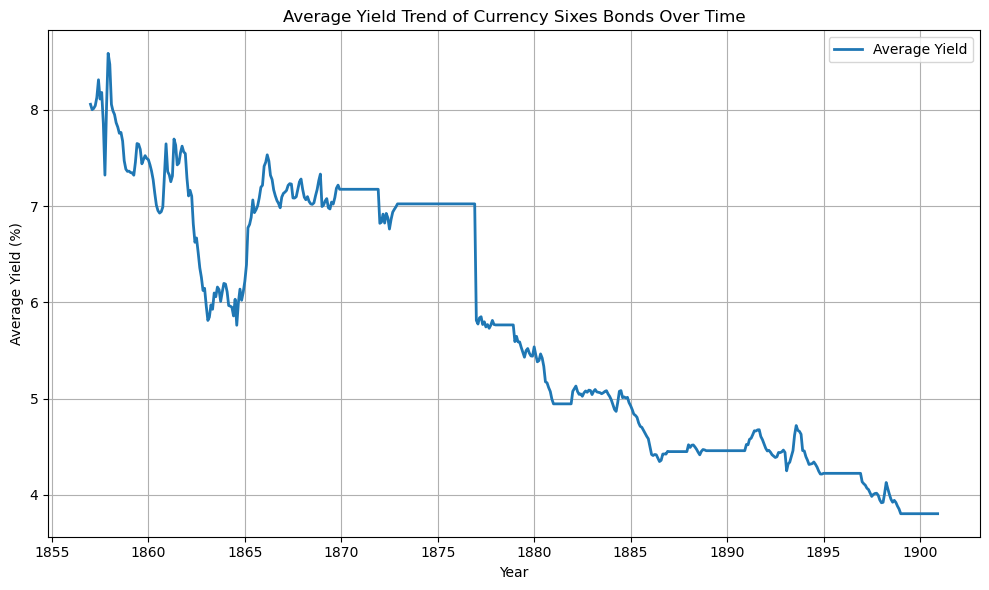

In [20]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
        outliers = df[outlier_condition]
        df[col] = df[col].mask(outlier_condition, df[col].median())
    return df

bond_yields = remove_outliers(bond_yields, yield_columns)

def plot_average_yield():
    avg_yield = bond_yields[yield_columns].mean(axis=1)
    avg_yield = avg_yield.fillna(method='ffill')
    plt.figure(figsize=(10, 6))
    plt.plot(bond_yields['Date'], avg_yield, label='Average Yield', linewidth=2)
    plt.title('Average Yield Trend of Currency Sixes Bonds Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Yield (%)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_average_yield()

## Marketability
- The Currency Sixes were set at a first-mortgage status over government-issued bonds after 1864 legislation. First-mortgage status, or first lien, meant that in the event of a default, these bonds would be paid back before government-issued bonds.
- The key here was to create a more secure bond that appealed to a wider range of investors [lower risk tolerance], which increased the pool of buyers.
- By balancing the financial burden between government and the private sector, the government could indirectly support private enterprises for the war without direct expenditure.
- To raise the appeal towards investors, the federal government granted land to the railroads along the rights of way. [200 feet on e/ side of track, sections 10 miles square alternating on each side].
- ** Note on Union Pacific Investment: Union Pacific bonds had a difficult time with gathering investments. Ten thousand shares of $1,000 each were supposed to be issued [only 10% had to be paid at time of subscription]. However, only 31 shares were established despite marketing in 24 cities.
- ^ Investors had limited liability and thought government inducements were insufficient (Dematos).
- After 1864 Amendment to Pacific Railway Act, capital-stock limitations were enacted. Company's capital stock cannot be greater than construction costs, preventing dilution of investors' shares.

## Pricing
- Various amounts of the loan were based on the geographical difficulty of building the railroads.
- Failure to complete the tracks by January 1, 1874, resulted in forfeiture of rights.
- Easy Grade was 16,000 dollars per mile.
- Moderate was 32,000 dollars per mile.
- Mountainous was 48,000 dollars per mile.
- The point of these prices could have been an incentive for the builders to finish the entire commissioned project instead of seeking small profits, thus creating a more sustainable source of funding for the investment.

## Historical Context
The issuance and performance of the Currency Sixes bonds were closely tied to the economic and political landscape of the time. Key events such as the Civil War, the Panic of 1873, and other economic crises affected the bond market and investor sentiment.

## Notable Events
- **Pacific Railway Act (1862):** This act facilitated the issuance of bonds to finance the construction of the Transcontinental Railroad.
- **1864 Amendment to the Pacific Railway Act:** This amendment provided additional support and resources for the railroad construction, impacting the allocation and issuance of bonds.
- **Panic of 1873:** This financial crisis led to significant fluctuations in bond prices as investors reacted to the economic downturn.
- **Completion of the Transcontinental Railroad:** The successful completion of the railroad projects boosted investor confidence and supported the bond prices.

## Conclusion
The Currency Sixes bonds were a pivotal financial instrument in the history of the United States. Their role in funding the Transcontinental Railroads and their impact on the economic development of the country highlight the importance of these bonds in American history.

In [22]:
def plot_combined_price():
    plt.figure(figsize=(14, 7))
    for column in price_columns:
        plt.plot(bond_prices['Date'], bond_prices[column], label=f'Bond {column}', linewidth=1)
    plt.title('Price Trends of All Currency Sixes Bonds Over Time')
    plt.xlabel('Year')
    plt.ylabel('Price ($)')
    plt.legend(title='Bond ID', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_combined_yield():
    plt.figure(figsize=(14, 7))
    for column in yield_columns:
        bond_yields[column] = bond_yields[column].fillna(method='ffill')
        plt.plot(bond_yields['Date'], bond_yields[column], label=f'Bond {column}', linewidth=1)
    plt.title('Yield Trends of All Currency Sixes Bonds Over Time')
    plt.xlabel('Year')
    plt.ylabel('Yield (%)')
    plt.legend(title='Bond ID', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_individual_price(bond_id):
    plt.figure(figsize=(10, 6))
    plt.plot(bond_prices['Date'], bond_prices[bond_id], label=f'Bond {bond_id}', linewidth=2)
    plt.title(f'Price Trend of Bond {bond_id} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Price ($)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_individual_yield(bond_id):
    plt.figure(figsize=(10, 6))
    plt.plot(bond_yields['Date'], bond_yields[bond_id], label=f'Bond {bond_id}', linewidth=2)
    plt.title(f'Yield Trend of Bond {bond_id} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Yield (%)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def display_graphs(view_type):
    if view_type == 'Combined Price':
        plot_combined_price()
    elif view_type == 'Combined Yield':
        plot_combined_yield()
    elif view_type == 'Individual Price':
        display_individual_price()
    elif view_type == 'Individual Yield':
        display_individual_yield()

def display_individual_price():
    bond_dropdown = widgets.Dropdown(options=price_columns, description='Bond ID:')
    interact(plot_individual_price, bond_id=bond_dropdown)

def display_individual_yield():
    bond_dropdown = widgets.Dropdown(options=yield_columns, description='Bond ID:')
    interact(plot_individual_yield, bond_id=bond_dropdown)

view_options = ['Combined Price', 'Combined Yield', 'Individual Price', 'Individual Yield']
view_dropdown = widgets.Dropdown(options=view_options, description='View:')
interact(display_graphs, view_type=view_dropdown);

interactive(children=(Dropdown(description='View:', options=('Combined Price', 'Combined Yield', 'Individual P…